In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
from sklearn import datasets, metrics
from keras.datasets import mnist
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

Using TensorFlow backend.


In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [3]:
data_test=x_test.reshape((len(x_test),-1))
data_train=x_train.reshape((len(x_train),-1))

In [4]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(data_train)

In [5]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [6]:
kmeans.labels_

array([5, 2, 1, ..., 5, 9, 0], dtype=int32)

In [7]:
kmeans.cluster_centers_

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

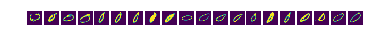

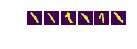

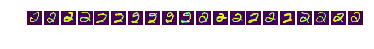

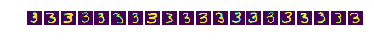

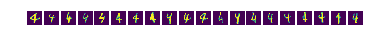

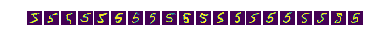

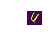

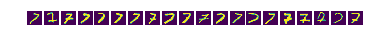

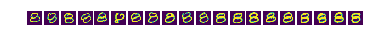

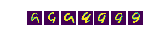

In [9]:
a=x_train[(y_train==0) & (kmeans.labels_==0)][0:20]
b=x_train[(y_train==1) & (kmeans.labels_==1)][0:20]
c=x_train[(y_train==2) & (kmeans.labels_==2)][0:20]
d=x_train[(y_train==3) & (kmeans.labels_==3)][0:20]
e=x_train[(y_train==4) & (kmeans.labels_==4)][0:20]
f=x_train[(y_train==5) & (kmeans.labels_==5)][0:20]
g=x_train[(y_train==6) & (kmeans.labels_==6)][0:20]
h=x_train[(y_train==7) & (kmeans.labels_==7)][0:20]
i=x_train[(y_train==8) & (kmeans.labels_==8)][0:20]
j=x_train[(y_train==9) & (kmeans.labels_==9)][0:20]
for char in (a,b,c,d,e,f,g,h,i,j):
    for index in range(0,len(char)):
        plt.subplot(10, 20, index + 1)
        plt.axis('off')
        plt.imshow(char[index])
    plt.show()

In [10]:
expected=y_train
predicted=kmeans.labels_

In [11]:
print("Classification report for classifier:\n%s\n"
      % (metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))
print("Accuracy: %s\n" % (metrics.accuracy_score(expected, predicted)))

Classification report for classifier:
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      5923
          1       0.00      0.00      0.00      6742
          2       0.03      0.02      0.02      5958
          3       0.53      0.64      0.58      6131
          4       0.03      0.03      0.03      5842
          5       0.23      0.28      0.25      5421
          6       0.00      0.00      0.00      5918
          7       0.01      0.01      0.01      6265
          8       0.01      0.01      0.01      5851
          9       0.00      0.00      0.00      5949

avg / total       0.08      0.10      0.09     60000


Confusion matrix:
[[  21   37 2506  163    3  187   14   17 2794  181]
 [2977    6    0    5 3717   10    9    9    0    9]
 [ 352  174   95  328  365  156   70 4196   10  212]
 [ 102  176  120 3922  427 1040   49  218   19   58]
 [ 309 3189   10    1  159   21 1940   38   10  165]
 [ 795  374  244 1776  161 1523  346   

In [14]:
classifier = LogisticRegression()
classifier.fit(data_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
expected = y_test
predicted = classifier.predict(data_test)

In [16]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))
print("Accuracy: %s\n" % (metrics.accuracy_score(expected, predicted)))

Classification report for classifier LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False):
             precision    recall  f1-score   support

          0       0.95      0.98      0.96       980
          1       0.96      0.98      0.97      1135
          2       0.93      0.88      0.90      1032
          3       0.90      0.91      0.90      1010
          4       0.93      0.93      0.93       982
          5       0.91      0.86      0.88       892
          6       0.93      0.95      0.94       958
          7       0.92      0.92      0.92      1028
          8       0.85      0.89      0.87       974
          9       0.90      0.89      0.90      1009

avg / total       0.92      0.92      0.92     10000


Confusion matrix:
[[ 961    0    1    1    0    3    7   

In [4]:
pca=PCA(n_components=100)
pca.fit(data_train)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [5]:
sum(pca.explained_variance_ratio_)

0.91428749821036348

In [6]:
pca_data=pca.transform(data_train)
pca_data.shape

(60000, 100)

In [8]:
classifier = LogisticRegression()
classifier.fit(pca_data,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
pca_test=pca.transform(data_test)
expected_pca = y_test
predicted_pca = classifier.predict(pca_test)

In [13]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected_pca, predicted_pca)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected_pca, predicted_pca))
print("Accuracy: %s\n" % (metrics.accuracy_score(expected_pca, predicted_pca)))

Classification report for classifier LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False):
             precision    recall  f1-score   support

          0       0.94      0.98      0.96       980
          1       0.96      0.98      0.97      1135
          2       0.93      0.89      0.91      1032
          3       0.90      0.90      0.90      1010
          4       0.91      0.92      0.92       982
          5       0.88      0.85      0.86       892
          6       0.93      0.96      0.94       958
          7       0.92      0.92      0.92      1028
          8       0.87      0.86      0.86       974
          9       0.89      0.88      0.88      1009

avg / total       0.91      0.91      0.91     10000


Confusion matrix:
[[ 959    0    1    2    0    5    8   